### Importing Packages

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Regression models, preprocessing models, and evaluation metrics.

from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

### Loading Data

In [3]:
train = pd.read_csv('./datasets/train.csv')
test= pd.read_csv('./datasets/test.csv')   

# Read in csv file and make a dataframe

### Surface Analysis of Dataframes

In [4]:
train.head() 
# Lets see the top 5 rows of our train data.

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
test.head() 
# Lets see the top 5 rows of our test data

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [6]:
train.sort_values(['Id'], inplace = True)
test.sort_values(['Id'], inplace = True)

#Sorting with ID makes looking at the dataframe easier.

In [7]:
train.drop("PID",axis=1,inplace=True)
test.drop("PID",axis=1,inplace=True)
#PID is redundant information since we already have ID to identify our houses.

In [8]:
print(train.shape)
print(test.shape)

#Taking note of the shape of the data frame. Clearly, there is a column missing in the test dataframe.

(2051, 80)
(879, 79)


The columns differ by one column. This makes sense because this is a kaggle competition and saleprice in test should be left unknown.

In [9]:
set(train.columns) - set(test.columns)
# The test column that is missing is the Saleprice column. This column will be removed when we make our dummy variables.

{'SalePrice'}

In [10]:
train.isnull().sum().sort_values(ascending=False)
# Taking a look at our columns with the most null values.

Pool QC            2042
Misc Feature       1986
Alley              1911
Fence              1651
Fireplace Qu       1000
Lot Frontage        330
Garage Qual         114
Garage Finish       114
Garage Cond         114
Garage Yr Blt       114
Garage Type         113
Bsmt Exposure        58
BsmtFin Type 2       56
Bsmt Cond            55
Bsmt Qual            55
BsmtFin Type 1       55
Mas Vnr Type         22
Mas Vnr Area         22
Bsmt Half Bath        2
Bsmt Full Bath        2
Garage Cars           1
Garage Area           1
Total Bsmt SF         1
Bsmt Unf SF           1
BsmtFin SF 2          1
BsmtFin SF 1          1
Year Built            0
Exterior 2nd          0
Exterior 1st          0
Roof Matl             0
                   ... 
Exter Qual            0
Heating               0
Foundation            0
Sale Type             0
Yr Sold               0
Mo Sold               0
Misc Val              0
Pool Area             0
Screen Porch          0
3Ssn Porch            0
Enclosed Porch  

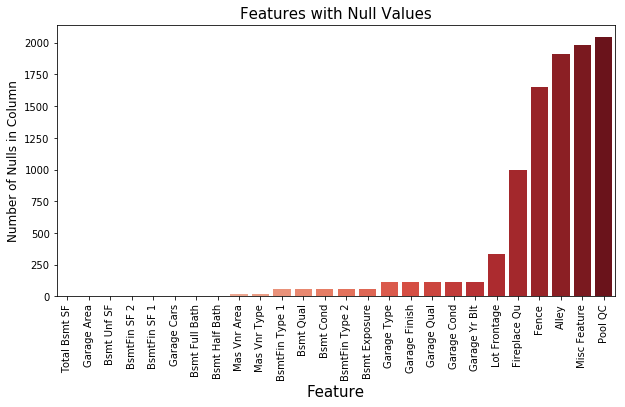

In [11]:
# Visualize the nulls in the dataframe
nulls = train.isnull().sum()
nulls = nulls[nulls > 0]
nulls.sort_values(inplace=True)
plt.figure(figsize=(10,5))
sns.barplot(x =(nulls.index), y =(nulls.values), palette="Reds")
plt.title("Features with Null Values", size=15)
plt.xlabel("Feature", size=15)
plt.ylabel("Number of Nulls in Column", size=12)
plt.xticks(rotation='vertical');

## Analyze the Target Variable

Our target variable is saleprice because that is the variable we are trying to learn.

In [12]:
train[['SalePrice']].describe()

,SalePrice
count,2051.000000
mean,181469.701609
std,79258.659352
min,12789.000000
25%,129825.000000
50%,162500.000000
75%,214000.000000
max,611657.000000


In [13]:
train[['SalePrice']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 1080 to 522
Data columns (total 1 columns):
SalePrice    2051 non-null int64
dtypes: int64(1)
memory usage: 32.0 KB


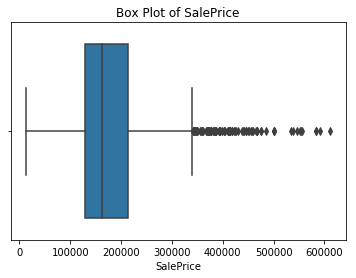

In [14]:
# Plot boxplot
sns.boxplot(x = 'SalePrice', data = train[['SalePrice']])
plt.title("Box Plot of SalePrice");

From the boxplot, it is clear that there are **outliers** in the target variable (SalePrice).

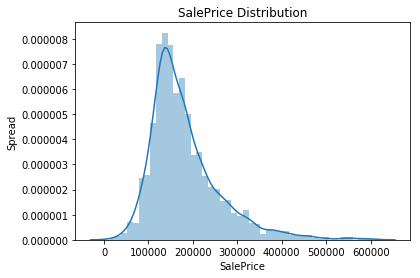

In [15]:
# What does the distribution look like?
sns.distplot(train['SalePrice'])
plt.title("SalePrice Distribution")
plt.xlabel("SalePrice")
plt.ylabel("Spread");

Now that we know our target variable is not in a normal distribution and is skewed to the right, lets see if the distribution of the log of saleprice is normal.

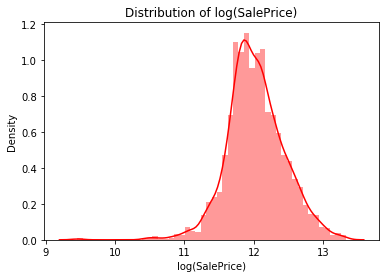

In [16]:
sns.distplot(np.log(train['SalePrice']), color = 'red')
plt.title("Distribution of log(SalePrice)")
plt.xlabel("log(SalePrice)")
plt.ylabel("Density");

This looks more normally distributed than the distribution provided from the data. If our model evaluation metrics are not good scores, we will consider using this distribution.

## Analyzing Features

### Analyze Numeric Features


In [17]:
numerics = train.select_dtypes(include=['int64','float64']).columns #Select columns that are either integers or floats 
numerics = numerics.drop(['SalePrice']) # drop SalePrice


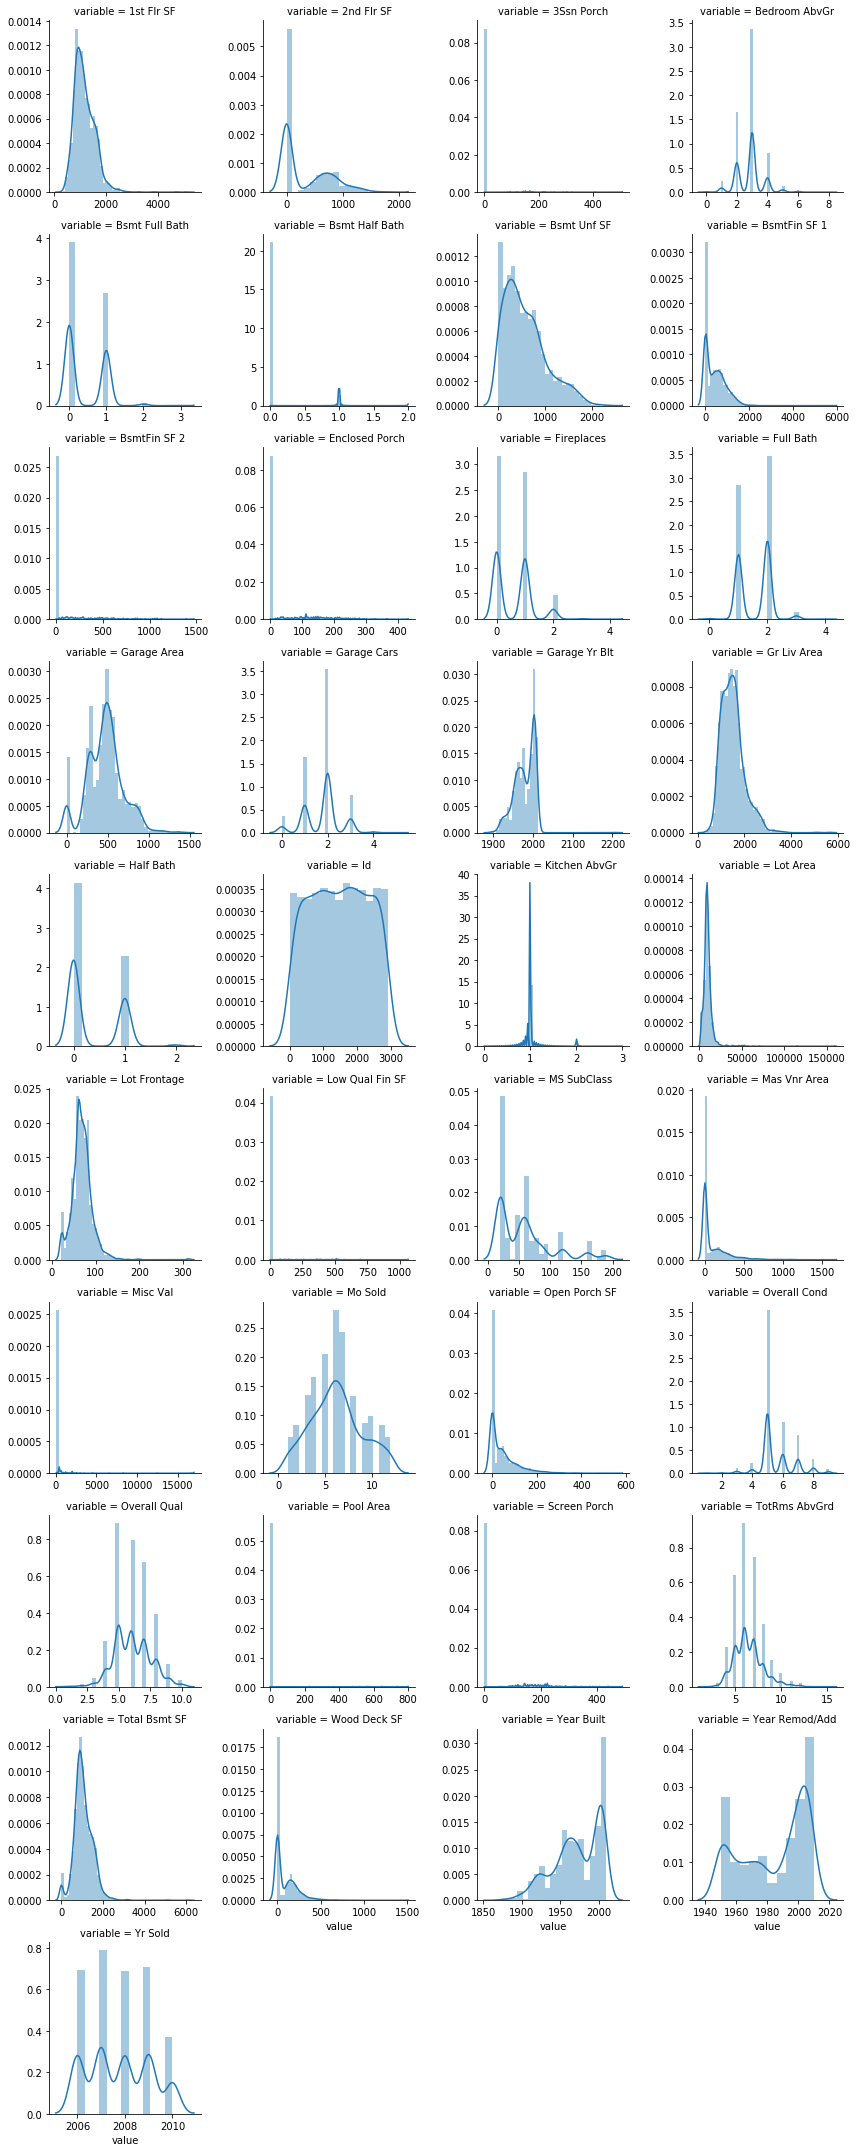

In [18]:
# Distribution of all numerical features
facet = pd.melt(train, value_vars=sorted(numerics))
feature_dist = sns.FacetGrid(facet, col='variable', col_wrap=4, sharex=False, sharey=False)
feature_dist = feature_dist.map(sns.distplot, 'value');

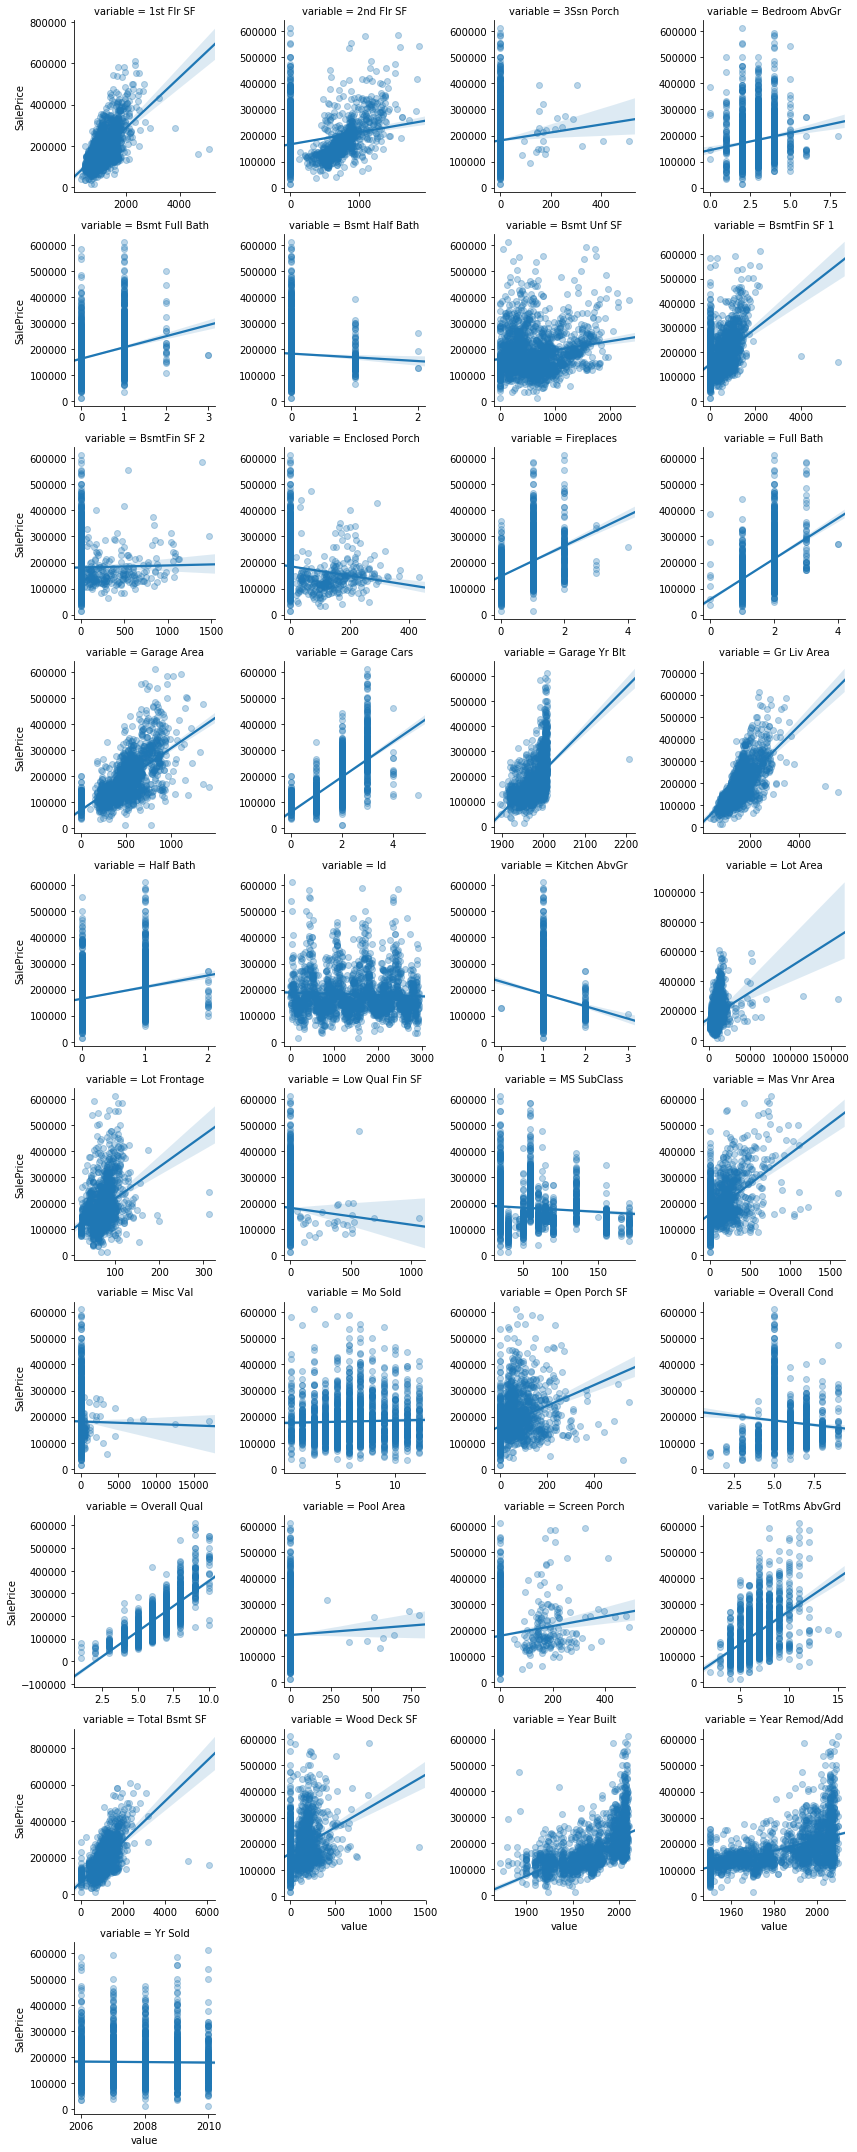

In [19]:
# Quick scatter plots of all numerical features with SalePrice
facet = pd.melt(train, id_vars=['SalePrice'],value_vars=sorted(numerics))
bivar_dist = sns.FacetGrid(facet, col='variable', col_wrap=4, sharex=False, sharey=False)
bivar_dist.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'alpha':0.3})
plt.tight_layout();

From these scatter plots, we can now see which features consist of outliers in relation to the target variable. From the numerical features that evidently have correlation with our target variable, outliers are visually located and removed. These specific numerical features are:
- BsmtFin SF 1
- Gr Liv Area
- Lot Area
- Lot Frontage
- Total Bsmt SF
- Wood Deck SF

In [20]:
# #We can see our Grade Level A category has outliers which must be removed. Cannot have skewed data!
# train = train[train['Gr Liv Area']< 4000].sort_values(by='Gr Liv Area',ascending = False)
# train = train[train['BsmtFin SF 1']< 4000].sort_values(by='BsmtFin SF 1',ascending = False)
# train = train[train['Lot Area']< 80_000].sort_values(by='Lot Area',ascending = False)
# train = train[train['Lot Frontage']< 250].sort_values(by='Lot Frontage',ascending = False)
# train = train[train['Total Bsmt SF']< 250].sort_values(by='Total Bsmt SF',ascending = False)
# train = train[train['Wood Deck SF']< 1300].sort_values(by='Wood Deck SF',ascending = False)

In [21]:
train = train[train['Gr Liv Area']< 4000]
train = train[train['BsmtFin SF 1']< 4000]
train = train[train['Lot Area']< 80_000]
train = train[train['Lot Frontage']< 250]
train = train[train['Total Bsmt SF']< 4000]
train = train[train['Wood Deck SF']< 1200]

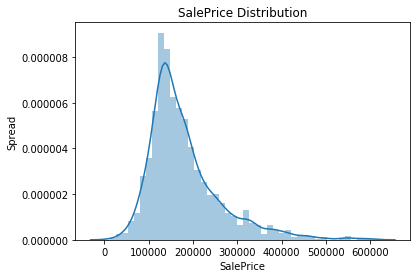

In [22]:
# What does the distribution look like?
sns.distplot(train['SalePrice'])
plt.title("SalePrice Distribution")
plt.xlabel("SalePrice")
plt.ylabel("Spread");

### Visualizing our data in graphs/plots.

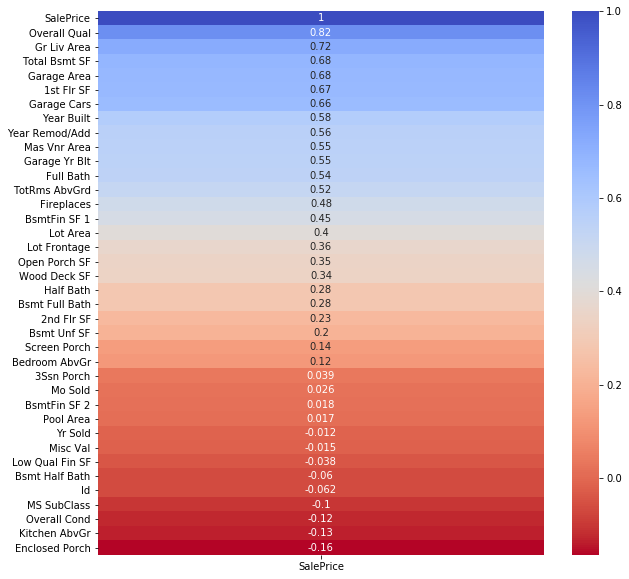

In [23]:
# Heatmap to visualize which variables have strong correlation to the price of houses.
plt.figure(figsize = (10,10))
sns.heatmap(train.corr()[['SalePrice']].sort_values('SalePrice',ascending=False), annot= True, cmap = 'coolwarm_r');

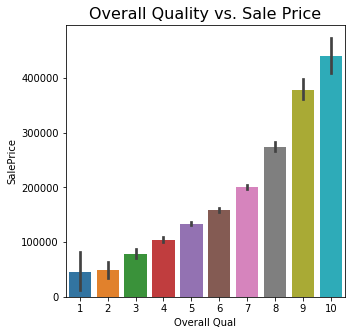

In [24]:
plt.figure(figsize = (5,5))
sns.barplot(train['Overall Qual'],train["SalePrice"],
data=train,)
plt.title("Overall Quality vs. Sale Price",fontsize = 16);
#Checking to see if the highest correlated variable had any outliers. 
#Overall quality looks like it has a positive robust correlation with sale price!

It looks like overall quality has a positive trend with saleprice. As overall quality increases, saleprice increases.

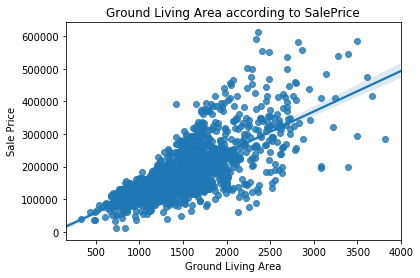

In [25]:
sns.regplot(train['Gr Liv Area'], train['SalePrice'])
plt.xlabel('Ground Living Area',
          fontsize = 10)
plt.ylabel("Sale Price",
          fontsize = 10)
plt.title('Ground Living Area according to SalePrice');

#Now we can visualize a robust positive linear correlation between Ground living area and saleprice.

### Imputing missing numerical values

#### We will impute missing numerical values with 0.

In [26]:
numeric_nulls_train = train.select_dtypes(include=[np.number]).columns
numeric_nulls_test= test.select_dtypes(include=[np.number]).columns
#Instantiating a variable to hold numeric values

In [27]:
train[numeric_nulls_train] = train[numeric_nulls_train].fillna(0)
test[numeric_nulls_test] = test[numeric_nulls_test].fillna(0)

In [28]:
train_num = train[numeric_nulls_train]
test_num = test[numeric_nulls_test]
# Assigning the 0's into our original dataframe's numeric null values.

In [29]:
train_num.drop(columns = ['SalePrice'], inplace=True)
#Don'forget to drop the SalePrice column for when the final variable is put together! This can cause errors!

/Users/masiurabik/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [30]:
print ('Numerical null Values in our Train set:',train_num.isnull().sum().value_counts())
print ('Numerical null values in our Test set:' ,test_num.isnull().sum().value_counts())

Numerical null Values in our Train set: 0    37
dtype: int64
Numerical null values in our Test set: 0    37
dtype: int64


### Imputing  missing values for Nominal Categories

In [32]:
# Instantiate a variable to hold our nominal categories.
train_nom = train.select_dtypes('object').columns
test_nom = test.select_dtypes('object').columns

train_nom = train[train_nom].copy()
test_nom = test[test_nom].copy()

# Impute missing values with NA to be assured we have all strings.
train_nom.fillna('NA', inplace=True)
test_nom.fillna('NA', inplace=True)

print("Nominal null Values in our Train set:",train_nom.isnull().sum().value_counts())
print("Nominal null Values in our Test set:",test_nom.isnull().sum().value_counts())

Nominal null Values in our Train set: 0    42
dtype: int64
Nominal null Values in our Test set: 0    42
dtype: int64


#### Dummy Variables for Nominal Categories

In [33]:
train_dummies = pd.get_dummies(train_nom, drop_first=True)
test_dummies = pd.get_dummies(test_nom, drop_first=True)
#instantiate a dummy variable for our nominal categoricals.

In [34]:
if(train_dummies.shape[1] != test_dummies.shape[1]):
    trn_dummies = set(train_dummies.columns) - set(test_dummies.columns)
    tst_dummies  = set(test_dummies.columns) - set(train_dummies.columns)
#Align our columns

In [35]:
for test_dummy in tst_dummies:
        train_dummies[test_dummy] = 0
for train_dummy in trn_dummies:
        test_dummies[train_dummy] = 0
        
# Add null dummy values into our dataframe and be assured our dataframes have the same number of columns.

In [36]:
test_dummies = test_dummies[train_dummies.columns]
#Make sure our test variable holds the same features as train

In [37]:
if train_dummies.shape[1] == test_dummies.shape[1]:
    print(test_dummies.shape)
    print(train_dummies.shape)
    print('We have an equal number of columns in both our train and test sets')
#The number of columns match ! Perfect!

(879, 229)
(1717, 229)
We have an equal number of columns in both our train and test sets


### Dictionary mapping ordinals into numerical ratings

In [38]:
lot_shape = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3':1, np.nan: 0}
utl = {'AllPub': 4, 'NoSewr': 3, 'Nosewa': 2, 'ELO':1, np.nan: 0}
lnd_slope = {'Gtl':3, 'Mod': 2, 'Sev': 1, np.nan: 0}
exter_qc = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0}
bsmt_qc= {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0, np.nan: 0}
bsmt_exp = {'Gd':3, 'Av': 2, 'Mn': 1, 'No': 0, 'NA':0, np.nan: 0}
bsmt_fin= {'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'NA': 0, np.nan: 0}
heat_qc = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0}
elct= {'SBrkr':5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1, np.nan: 0}
ktchen_qual = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0}
funct = {'Typ': 8,'Min1': 7,'Min2': 6,'Mod': 5,'Maj1': 4,'Maj2': 3,'Sev': 2,'Sal': 1, np.nan: 0}
garage_qc = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0, np.nan: 0}
garage_fin = {'Fin': 3, 'RFn': 2, 'Unf': 1, 'NA':0, np.nan: 0}
paved_dr = {'Y': 3, 'P': 2, 'N':1, np.nan: 0}

# Assign a ranking system for our ordinal categories.

In [39]:
train['Lot Shape']= train['Lot Shape'].replace(lot_shape)
train['Utilities']= train['Utilities'].replace(utl)
train['Land Slope']= train['Land Slope'].replace(lnd_slope)
train['Exter Qual']= train['Exter Qual'].replace(exter_qc)
train['Exter Cond']= train['Exter Cond'].replace(exter_qc)
train['Bsmt Qual']= train['Bsmt Qual'].replace(bsmt_qc)
train['Bsmt Cond']= train['Bsmt Cond'].replace(bsmt_qc)
train['Bsmt Exposure']= train['Bsmt Exposure'].replace(bsmt_exp)
train['BsmtFin Type 1']= train['BsmtFin Type 1'].replace(bsmt_fin)
train['BsmtFin Type 2']= train['BsmtFin Type 2'].replace(bsmt_fin)
train['Heating QC']= train['Heating QC'].replace(exter_qc)
train['Electrical']= train['Electrical'].replace(elct)
train['Kitchen Qual']= train['Kitchen Qual'].replace(ktchen_qual)
train['Functional']= train['Functional'].replace(funct)
train['Garage Finish']= train['Garage Finish'].replace(garage_fin)
train['Garage Qual']= train['Garage Qual'].replace(garage_qc)
train['Garage Cond']= train['Garage Cond'].replace(garage_qc)
train['Paved Drive']= train['Paved Drive'].replace(paved_dr)

# Mapping and replacing our ordinal categories with the numerical ranking system we set up for the Train set.

In [40]:
test['Lot Shape']= test['Lot Shape'].replace(lot_shape, inplace= True)
test['Utilities']= test['Utilities'].replace(utl, inplace= True)
test['Land Slope']= test['Land Slope'].replace(lnd_slope, inplace= True)
test['Exter Qual']= test['Exter Qual'].replace(exter_qc, inplace= True)
test['Exter Cond']= test['Exter Cond'].replace(exter_qc, inplace= True)
test['Bsmt Qual']= test['Bsmt Qual'].replace(bsmt_qc,inplace= True)
test['Bsmt Cond']= test['Bsmt Cond'].replace(bsmt_qc,inplace= True)
test['Bsmt Exposure']= test['Bsmt Exposure'].replace(bsmt_exp,inplace= True)
test['BsmtFin Type 1']= test['BsmtFin Type 1'].replace(bsmt_fin,inplace= True)
test['BsmtFin Type 2']= test['BsmtFin Type 2'].replace(bsmt_fin,inplace= True)
test['Heating QC']= test['Heating QC'].replace(exter_qc, inplace= True)
test['Electrical']= test['Electrical'].replace(elct, inplace= True)
test['Kitchen Qual']= test['Kitchen Qual'].replace(elct, inplace= True)
test['Functional']= test['Functional'].replace(funct, inplace= True)
test['Garage Finish']= test['Garage Finish'].replace(garage_fin, inplace= True)
test['Garage Qual']= test['Garage Qual'].replace(garage_fin, inplace= True)
test['Garage Cond']= test['Garage Cond'].replace(garage_qc, inplace= True)
test['Paved Drive']= test['Paved Drive'].replace(paved_dr, inplace=True)

#Mapping and replacing our ordinal categories with the numerical ranking system we set up for the Test set.

### Now that we're done with our different categories, lets put them together in one final dataframe.

In [41]:
y = train['SalePrice']
final_train = train_num.join(train_dummies).join(y)

In [42]:
final_test = test_num.join(test_dummies).join(y)

In [43]:
#Save as csv!
final_train.to_csv(".final_train.csv")
final_test.to_csv(".final_test.csv")

## Model 1: Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
#import our libraries for modeling

In [45]:
X = train_num
y= train['SalePrice']

#Assign our target and freatures 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Preprocess data with a train-test split

ss = StandardScaler()

X_train = ss.fit_transform(X_train) 
X_test = ss.transform(X_test)

# Scaling our features

/Users/masiurabik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/masiurabik/anaconda3/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/masiurabik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [47]:
lr = LinearRegression()
# Instantiate a linear regression model

lr.fit(X_train,y_train)
# Fit

reg = lr.fit(X_train, y_train)

# Predict y_hat
yhat_train = reg.predict(X_train)
yhat_test = reg.predict(X_test)

In [48]:
# Visualize coefficients

df_coef = pd.DataFrame(reg.coef_)
df_coef['name'] = X.columns
df_coef['abs_coef'] = (df_coef[0])
df_coef.sort_values(by = 'abs_coef', ascending = False, inplace=True)

df_coef.head(10)

,0,name,abs_coef
16,2.496689e+14,Gr Liv Area,2.496689e+14
12,5.962039e+13,Total Bsmt SF,5.962039e+13
4,2.242637e+04,Overall Qual,2.242637e+04
6,1.019893e+04,Year Built,1.019893e+04
27,8.695999e+03,Garage Area,8.695999e+03
23,8.586734e+03,TotRms AbvGrd,8.586734e+03
3,8.318522e+03,Lot Area,8.318522e+03
8,6.521516e+03,Mas Vnr Area,6.521516e+03
5,4.400533e+03,Overall Cond,4.400533e+03
7,3.928402e+03,Year Remod/Add,3.928402e+03


Garage living area and total basement square feet appear as the two features with the highest correlations with saleprice.

In [49]:
# Evaluation metrics
cv_score = cross_val_score(lr,X_train,y_train, cv=5).mean()
print('Cross-Val score (k=5)', cv_score)
print('Train R-squared score:', r2_score(y_train, yhat_train))
print('Test R-squared score:', r2_score(y_test, yhat_test))
print('Train Root Mean Squared Error score:', np.sqrt(mean_squared_error(yhat_train,y_train)))
print('Test Root Mean Squared Error score:', np.sqrt(mean_squared_error(yhat_test,y_test)))

Cross-Val score (k=5) 0.877276596522824
Train R-squared score: 0.8879319503701858
Test R-squared score: 0.8935121616022069
Train Root Mean Squared Error score: 27362.50856913365
Test Root Mean Squared Error score: 27653.811450600922


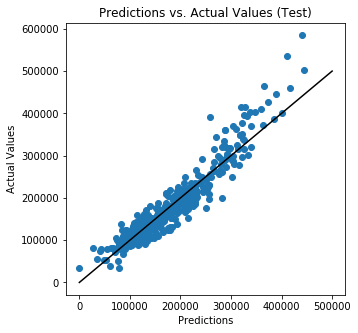

In [57]:
plt.figure(figsize = (5,5))
plt.scatter(predictions_test, y_test)
plt.title('Predictions vs. Actual Values (Test)')
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
xline = range(0,500000)
yline = xline
plt.plot(xline, yline, color='black');

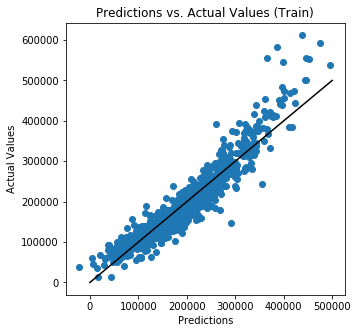

In [58]:
plt.figure(figsize = (5,5))
plt.scatter(predictions_train, y_train)
plt.title('Predictions vs. Actual Values (Train)')
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
xline = range(0,500000)
yline = xline
plt.plot(xline, yline, color='black');

Based on our regression model, our train set's R-squared score comes out to 0.888, which is better than our test sets R-squared score of 0.894. This indicates the model being slightly underfit, favoring low bias and high variance. Lets see how the model performs being regularized.

## Model 2: Ridge Regression

In [59]:
r_alphas = np.logspace(0, 5, 100)

ridge_model = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

ridge_model = ridge_model.fit(X_train, y_train)

# Fitting ridge regression model

In [60]:
ridge_train = ridge_model.predict(X_train)
ridge_test = ridge_model.predict(X_test)

# Assign predictions to variable

In [86]:
ridge_cv_score = cross_val_score(ridge_model,X_train,y_train, cv=5).mean()
print('Cross-Val score (k=5)', ridge_cv_score)
print(f'RMSE Train: {np.sqrt(mean_squared_error(ridge_train,y_train))}')
print(f'RMSE Test: {np.sqrt(mean_squared_error(ridge_test,y_test))}')
print(f'R-Squared Train score: {ridge_model.score(X_train, y_train)}')
print(f'R-Squared Test score: {ridge_model.score(X_test, y_test)}')

#Model evaluation metrics

Cross-Val score (k=5) 0.877556203827716
RMSE Train: 27391.330108605664
RMSE Test: 27660.13045130335
R-Squared Train score: 0.8876957384885591
R-Squared Test score: 0.8934634902928965


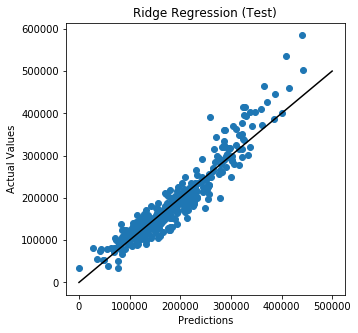

In [65]:
plt.figure(figsize = (5,5))
plt.scatter(ridge_test,y_test)
plt.title('Ridge Regression (Test)')
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
xline = range(0,500000)
yline = xline
plt.plot(xline, yline, color='k');

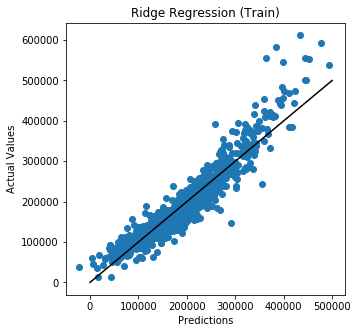

In [64]:
plt.figure(figsize = (5,5))
plt.scatter(ridge_train,y_train)
plt.title('Ridge Regression (Train)')
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
xline = range(0,500000)
yline = xline
plt.plot(xline, yline, color='k');

In [780]:
X_kaggle = train_num
ss=StandardScaler()
ss.fit(X_kaggle)
X_kaggle_scaled = ss.transform(X_kaggle)

X_kaggle['SalePrice'] = ridge_model.predict(X_kaggle_scaled)
X_kaggle.head()

# Fit and make a model for our test data.

/Users/masiurabik/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/masiurabik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
/Users/masiurabik/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Id,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
1080,1,20,141.0,31770,6,5,1960,1960,112.0,639.0,...,210,62,0,0,0,0,0,5,2010,228890.572583
304,3,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,393,36,0,0,0,0,12500,6,2010,165070.418282
574,5,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,212,34,0,0,0,0,0,3,2010,186006.392136
1673,8,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,82,0,0,144,0,0,1,2010,199171.271825
458,9,120,39.0,5389,8,5,1995,1996,0.0,1180.0,...,237,152,0,0,0,0,0,3,2010,248762.696134


# Based on our Ridge Regression model, our train set's R-squared value comes out to 0.888, which is minimally worse than our test set's R-squared score of 0.893. With the minimal difference between the train and test sets score, our model is well fit.

## Model 3: Lasso Regression

In [83]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=0)
optimal_lasso.fit(X, y)

print('Optimal Alpha(Lasso):',optimal_lasso.alpha_)

#Finding us an optimal alpha for lasso regresion and fitting our data.

/Users/masiurabik/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimal Alpha(Lasso): 156981.06866537879


In [73]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_scores = cross_val_score(lasso, X, y, cv=10)

print(lasso_scores)
print(np.mean(lasso_scores))

#Finding the R-squared score for our lasso regression.

[0.8433643  0.84710003 0.65480559 0.86261608 0.74054764 0.82150819
 0.65481185 0.77683685 0.80511322 0.77386823]
0.7780571985142115


In [84]:
print(f'RMSE Train: {np.sqrt(mean_squared_error(lasso_train,y_train))}')
print(f'RMSE Test: {np.sqrt(mean_squared_error(lasso_test,y_test))}')
print(f'R-Squared Train score: {lasso_model.score(X_train, y_train)}')
print(f'R-Squared Test score: {lasso_model.score(X_test, y_test)}')

#Model evaluation metrics

RMSE Train: 34102.41104351419
RMSE Test: 35314.81574239572
R-Squared Train score: 0.8259234936078266
R-Squared Test score: 0.8263383568930852


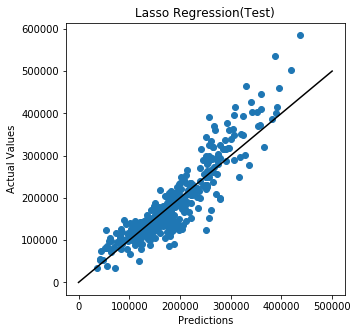

In [80]:
plt.figure(figsize = (5,5))
plt.scatter(lasso_test,y_test)
plt.title('Lasso Regression(Test)')
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
xline = range(0,500000)
yline = xline
plt.plot(xline, yline, color='k');

#plotting our lasso regression

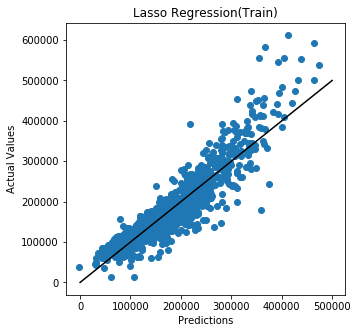

In [82]:
plt.figure(figsize = (5,5))
plt.scatter(lasso_train,y_train)
plt.title('Lasso Regression(Train)')
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
xline = range(0,500000)
yline = xline
plt.plot(xline, yline, color='k');

#plotting our lasso regression

## Conclusion

From the regression models that were ran, the models that performed the best were the linear regression model and ridge regression model. Both models produced similar R-squared scores of 0.89 for the train set and 0.89 for the test set. Although both of the models produced scores that were not overfit and had relatively high scores, further steps to increase the R-squared score can be to use the log distribution of the saleprice because this distribution was noted as more normal than the original saleprice.